In [2]:
#사용될 라이브러리들을 import합니다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#경고 문구 무시
import warnings
warnings.filterwarnings('ignore')

#matplotlib 스타일 정의
plt.style.use('fivethirtyeight')

In [65]:
data = pd.read_csv('/Users/jugjug/Desktop/loan_train.csv')
data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,recoveries,collection_recovery_fee,policy_code,tot_cur_bal,total_rev_hi_lim
0,1,15000,15000,15000.0,60 months,19.99,397.33,E,E4,Sales Consultant,...,39.3,17,w,14401.39,14401.39,0.0,0.0,1,43804.0,29900.0
1,2,20000,20000,20000.0,36 months,18.99,733.02,E,E1,TRANSPORTAION MANAGER,...,97.7,29,w,11947.70,11947.70,0.0,0.0,1,50777.0,41900.0
2,3,10000,10000,10000.0,60 months,16.99,248.48,D,D3,supervisor,...,12.0,25,w,9101.23,9101.23,0.0,0.0,1,149114.0,14700.0
3,4,12000,12000,12000.0,36 months,15.31,417.81,C,C2,TM AG LLC,...,84.1,14,f,0.00,0.00,0.0,0.0,1,75043.0,10700.0
4,5,20000,20000,20000.0,36 months,9.99,645.25,B,B3,Instructor,...,47.5,29,w,0.00,0.00,0.0,0.0,1,259060.0,16800.0


해당 데이터는 채무불이행률에 관한 데이터이다. 
각 행마다 한 사람의 경제적 상태를 나타내며, loan_train_label이라는 데이터에 채무를 이행했는지, 불이행했는지를 나타낸다.
분류모델 훈련에 사용되는 데이터이다. 

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       16000 non-null  int64  
 1   loan_amnt                16000 non-null  int64  
 2   funded_amnt              16000 non-null  int64  
 3   funded_amnt_inv          16000 non-null  float64
 4   term                     16000 non-null  object 
 5   int_rate                 16000 non-null  float64
 6   installment              16000 non-null  float64
 7   grade                    16000 non-null  object 
 8   sub_grade                16000 non-null  object 
 9   emp_title                15011 non-null  object 
 10  emp_length               15191 non-null  object 
 11  home_ownership           16000 non-null  object 
 12  annual_inc               16000 non-null  float64
 13  pymnt_plan               16000 non-null  object 
 14  purpose               

In [29]:
data.isna().sum()

id                            0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                   989
emp_length                  809
home_ownership                0
annual_inc                    0
pymnt_plan                    0
purpose                       0
title                         0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    9
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
recoveries                    0
collection_recovery_fee       0
policy_c

object형 데이터에 대한 column들 확인

In [35]:
objectdf = data.select_dtypes(include=['object'])
objectdf.head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,pymnt_plan,purpose,title,addr_state,earliest_cr_line,initial_list_status
0,60 months,E,E4,Sales Consultant,2 years,RENT,n,debt_consolidation,Debt consolidation,VA,Jan-2010,w
1,36 months,E,E1,TRANSPORTAION MANAGER,10+ years,RENT,n,debt_consolidation,Debt consolidation,NJ,Nov-1994,w
2,60 months,D,D3,supervisor,10+ years,MORTGAGE,n,debt_consolidation,Debt consolidation,AL,Sep-2000,w
3,36 months,C,C2,TM AG LLC,2 years,OTHER,n,credit_card,Credit card refinancing,SD,Aug-2005,f
4,36 months,B,B3,Instructor,10+ years,OWN,n,home_improvement,Home improvement,DE,Mar-1993,w


In [40]:
objectdf.columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'pymnt_plan', 'purpose', 'title', 'addr_state',
       'earliest_cr_line', 'initial_list_status'],
      dtype='object')

In [45]:
for a in objectdf.columns:
    print(a,data[a].nunique())

term 2
grade 7
sub_grade 35
emp_title 10412
emp_length 11
home_ownership 5
pymnt_plan 2
purpose 14
title 2830
addr_state 49
earliest_cr_line 527
initial_list_status 2


emp_title과 earliest_cr_line, title은 encoding을 하기에는 수가 너무 많아서 drop
추가적으로 데이터에 대한 점검을 해본결과, emp_length,addr_state,purpose는 의미가 없는 데이터이기 때문에 drop

term,grade,initial_list_status,pymnt_plan,home_ownership은 수치형 데이터로 encoding한다.

In [67]:
data.drop(['emp_title','emp_length','purpose','title','addr_state','earliest_cr_line','sub_grade'],axis=1,inplace=True)

In [68]:
encodelist =['term','grade','home_ownership','pymnt_plan','initial_list_status']
for i in encodelist:
    print(data[i].unique())

[' 60 months' ' 36 months']
['E' 'D' 'C' 'B' 'F' 'A' 'G']
['RENT' 'MORTGAGE' 'OTHER' 'OWN' 'NONE']
['n' 'y']
['w' 'f']


home_ownership은 one-hot encoding, 나머지는 레이블 인코딩을 진행한다

In [69]:
data['home_ownership'].value_counts()

MORTGAGE    7481
RENT        7026
OWN         1490
NONE           2
OTHER          1
Name: home_ownership, dtype: int64

상위 3개의 데이터만 인코딩

In [72]:
home = ['MORTGAGE','RENT','OWN']
for t in home:
    data['home_ownership'+'_'+t] = np.where(data['home_ownership']==t,1,0)
data.drop(['home_ownership'],axis=1,inplace=True)
data['home_ownership_MORTGAGE']

0        0
1        0
2        1
3        0
4        0
        ..
15995    0
15996    1
15997    0
15998    0
15999    1
Name: home_ownership_MORTGAGE, Length: 16000, dtype: int64

나머지는 label encoding

In [74]:
from sklearn.preprocessing import LabelEncoder
LElist = ['term','grade','pymnt_plan','initial_list_status']
LE = LabelEncoder()
for i in LElist:
    data[i] = LE.fit_transform(data[i])
data['grade'].value_counts()

2    4481
1    3953
3    3115
0    1842
4    1687
5     731
6     191
Name: grade, dtype: int64

In [80]:
data.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'annual_inc', 'pymnt_plan', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'recoveries', 'collection_recovery_fee', 'policy_code',
       'tot_cur_bal', 'total_rev_hi_lim', 'home_ownership_MORTGAGE',
       'home_ownership_RENT', 'home_ownership_OWN'],
      dtype='object')

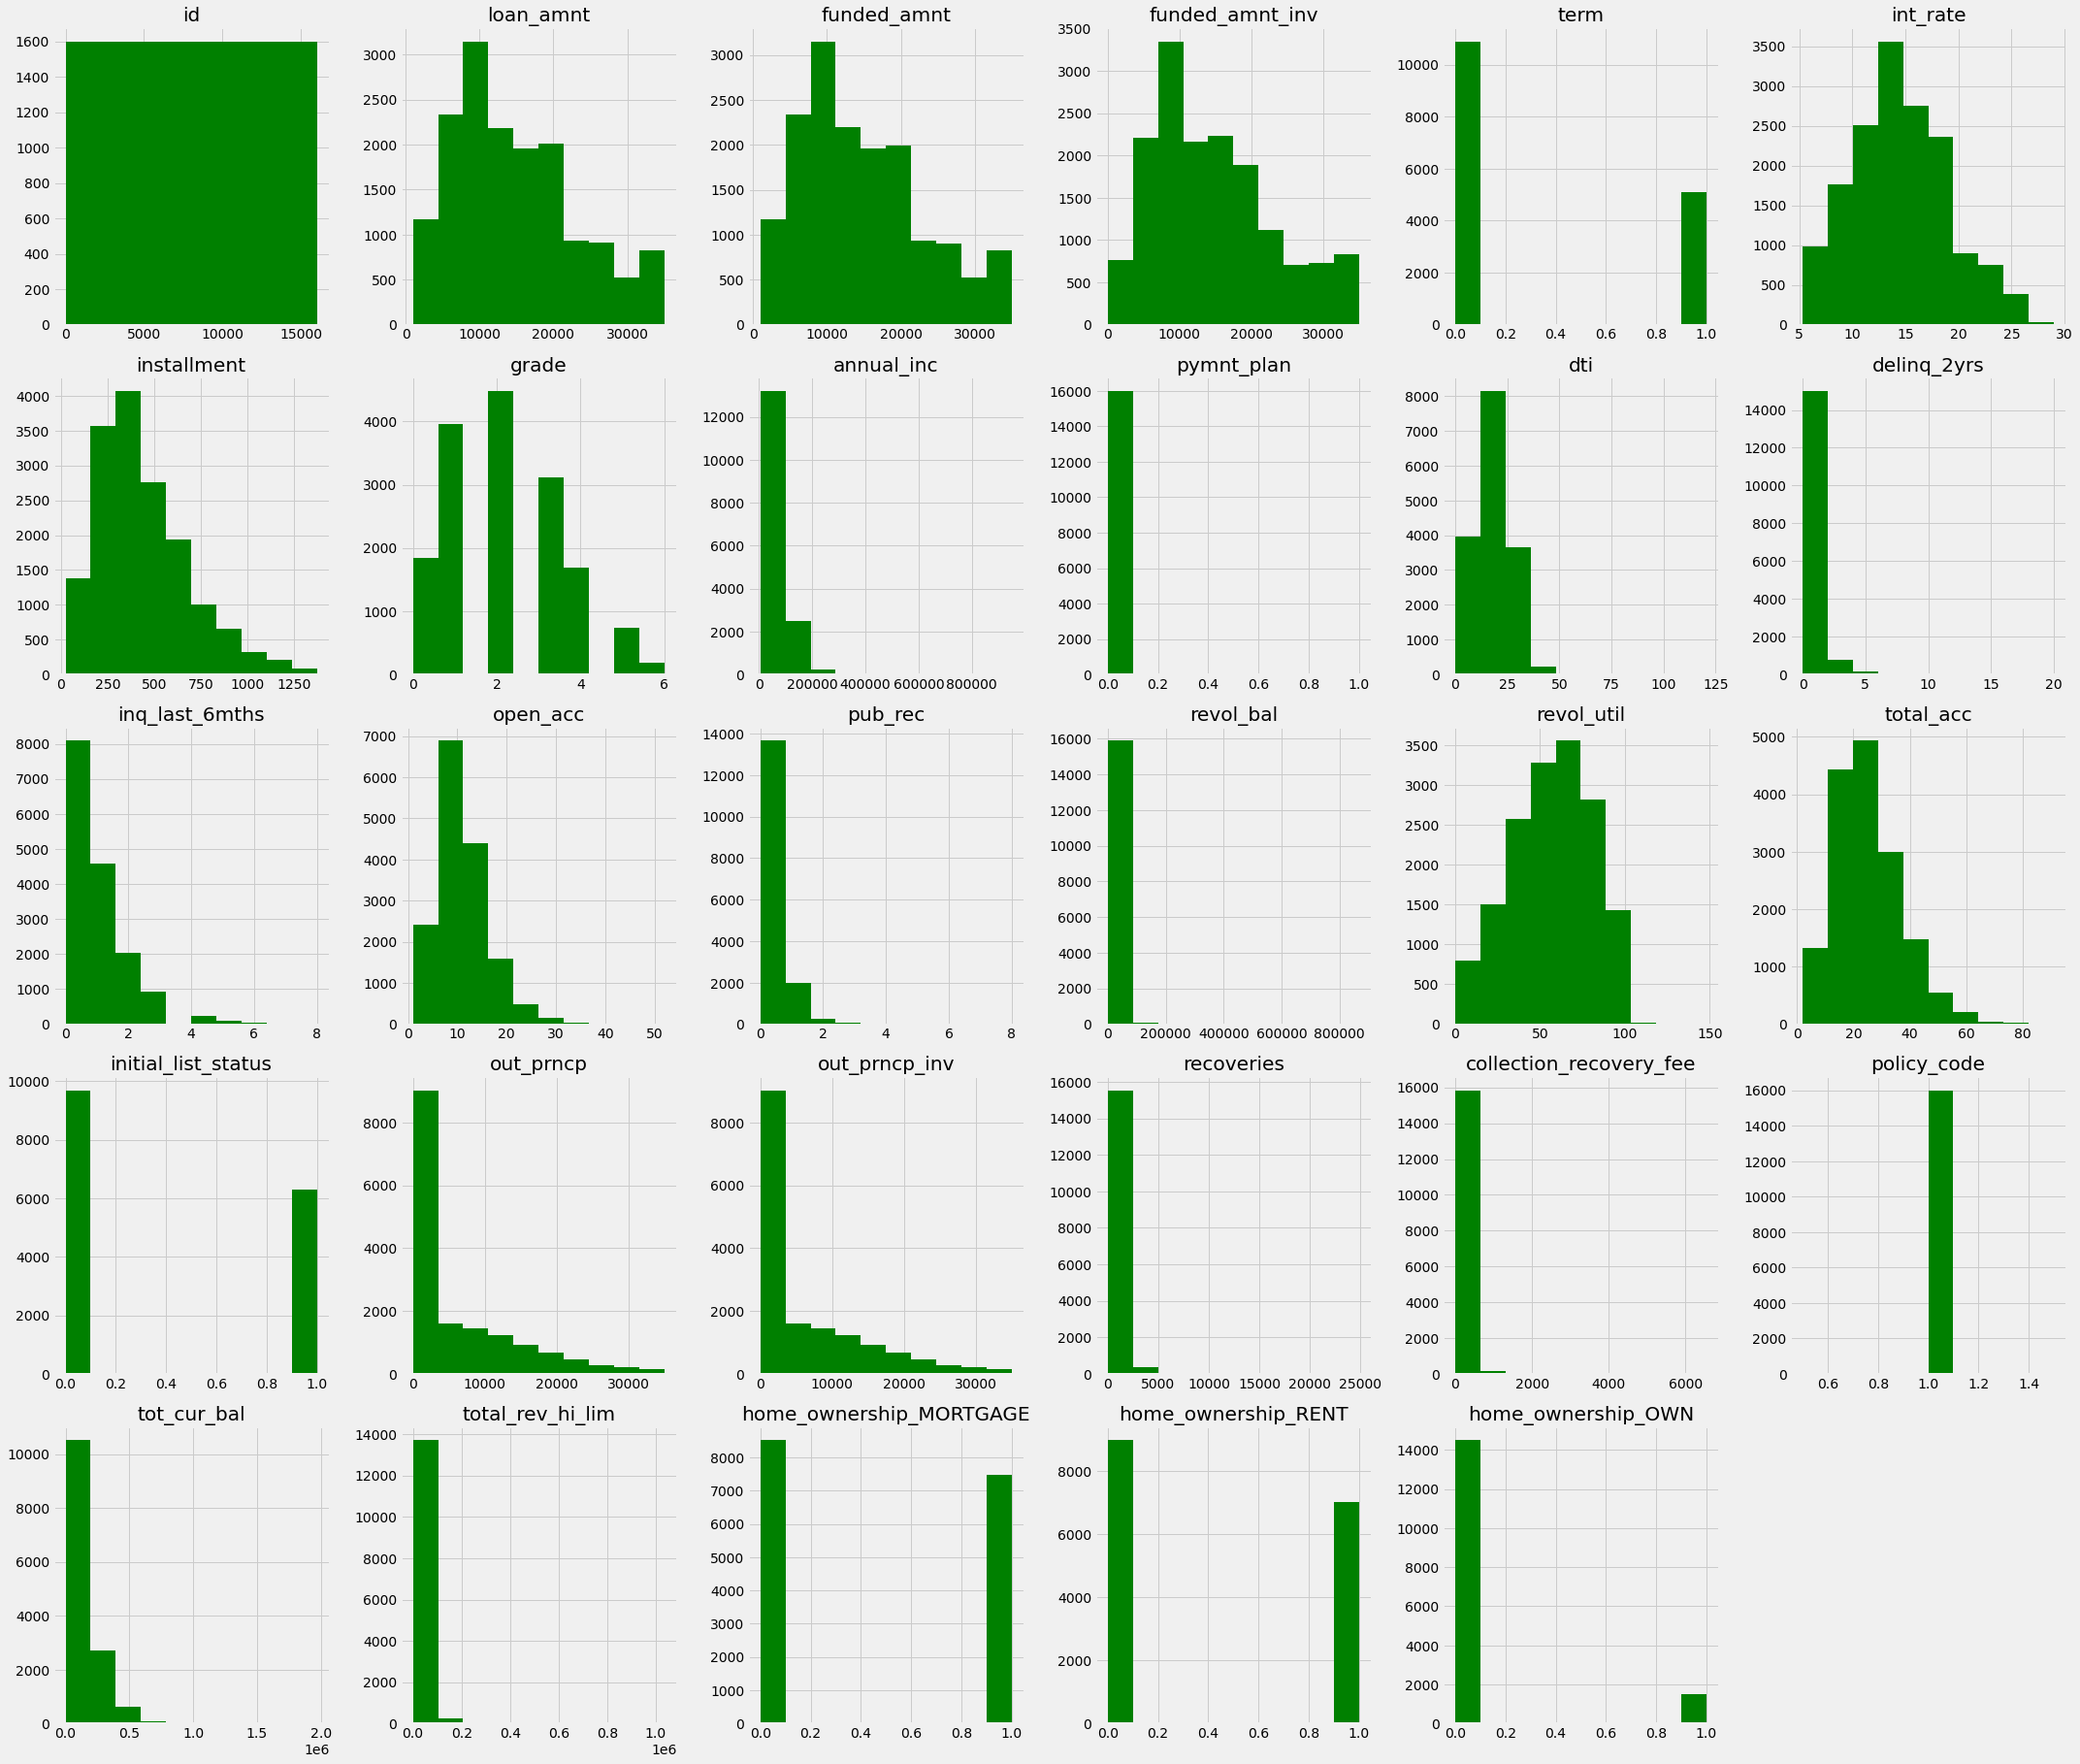

In [76]:
plt.figure(figsize=(30,30))
for i, col in enumerate(data.columns.to_list()):
    plt.subplot(6, 6, i + 1)
    plt.hist(data[col], label=col,color='green')
    plt.title(col)
    plt.tight_layout()

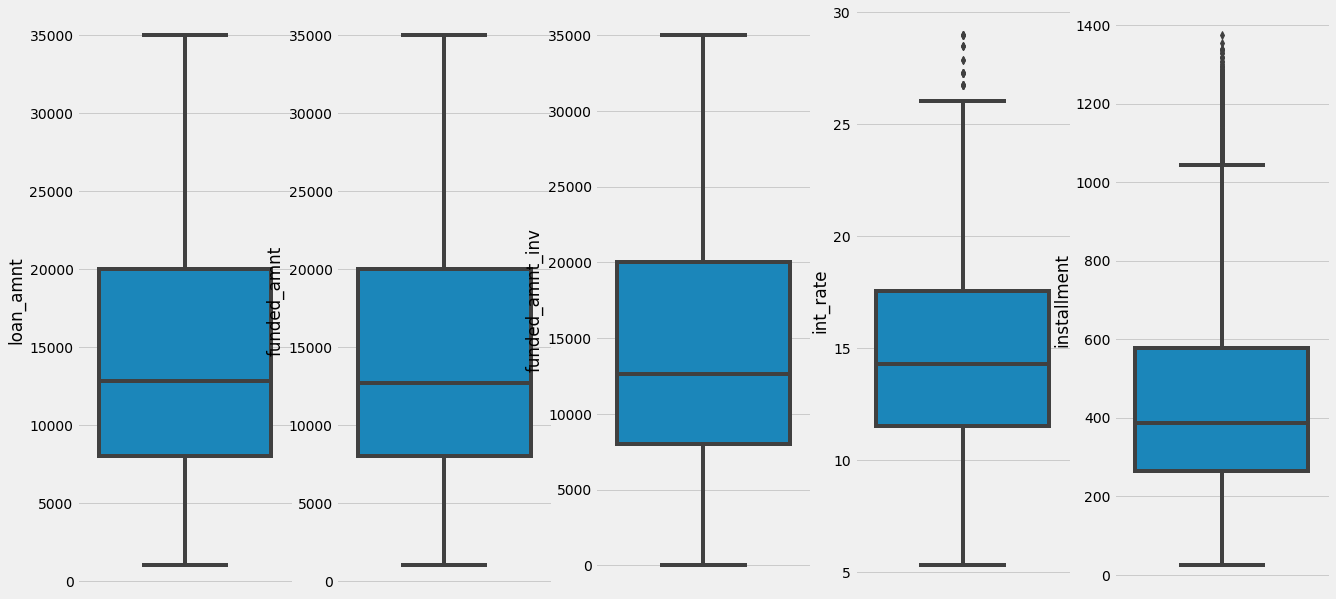

In [89]:
plt.figure(figsize=(20,10))
x = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment']
count=0
for i in x:
    plt.subplot(1,5,count+1)
    sns.boxplot(data=data,y=i)
    count+=1

int_rate에 outlier가 조금 있는 것으로 보인다. boxplot을 통해 index을하고 이상치가 있는 행을 제거해준다

In [92]:
x1 = data['int_rate'].quantile(0.25)
x2 = data['int_rate'].quantile(0.75)
iqr = x2-x1

outlier = data['int_rate']>x2+1.5*iqr
data[outlier]

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,annual_inc,pymnt_plan,...,out_prncp,out_prncp_inv,recoveries,collection_recovery_fee,policy_code,tot_cur_bal,total_rev_hi_lim,home_ownership_MORTGAGE,home_ownership_RENT,home_ownership_OWN
350,351,3675,3675,3675.0,0,26.77,149.58,6,10000.0,0,...,3246.12,3246.12,0.0,0.0,1,8456.0,7600.0,0,0,1
354,355,16800,16800,16800.0,1,27.31,516.12,6,40000.0,0,...,16389.46,16389.46,0.0,0.0,1,29063.0,17400.0,0,1,0
2166,2167,9350,9350,9350.0,0,26.77,380.57,6,86000.0,0,...,8450.83,8450.83,0.0,0.0,1,33850.0,2800.0,0,1,0
2796,2797,13150,13150,13150.0,1,27.31,403.98,6,50000.0,0,...,12365.06,12365.06,0.0,0.0,1,28302.0,18200.0,0,1,0
2911,2912,5100,5100,5100.0,0,27.31,209.06,6,35000.0,0,...,5100.00,5100.00,0.0,0.0,1,54145.0,5700.0,0,1,0
3571,3572,13425,13425,13425.0,1,26.77,408.10,6,32000.0,0,...,12857.17,12857.17,0.0,0.0,1,8685.0,31200.0,0,0,1
3839,3840,20875,20875,20850.0,1,28.49,656.15,6,58000.0,0,...,20875.00,20850.00,0.0,0.0,1,28773.0,12700.0,0,0,1
4237,4238,11550,11550,11550.0,1,28.99,366.55,6,45000.0,0,...,10891.12,10891.12,0.0,0.0,1,31556.0,7000.0,0,1,0
4548,4549,28750,28750,28750.0,1,26.77,873.95,6,57500.0,0,...,28036.56,28036.56,0.0,0.0,1,239381.0,22600.0,0,1,0
5776,5777,21600,21600,21600.0,1,28.99,685.50,6,72000.0,0,...,21268.69,21268.69,0.0,0.0,1,63388.0,50100.0,0,0,1


In [94]:
ind = data[outlier].index
data.drop(ind,inplace=True)

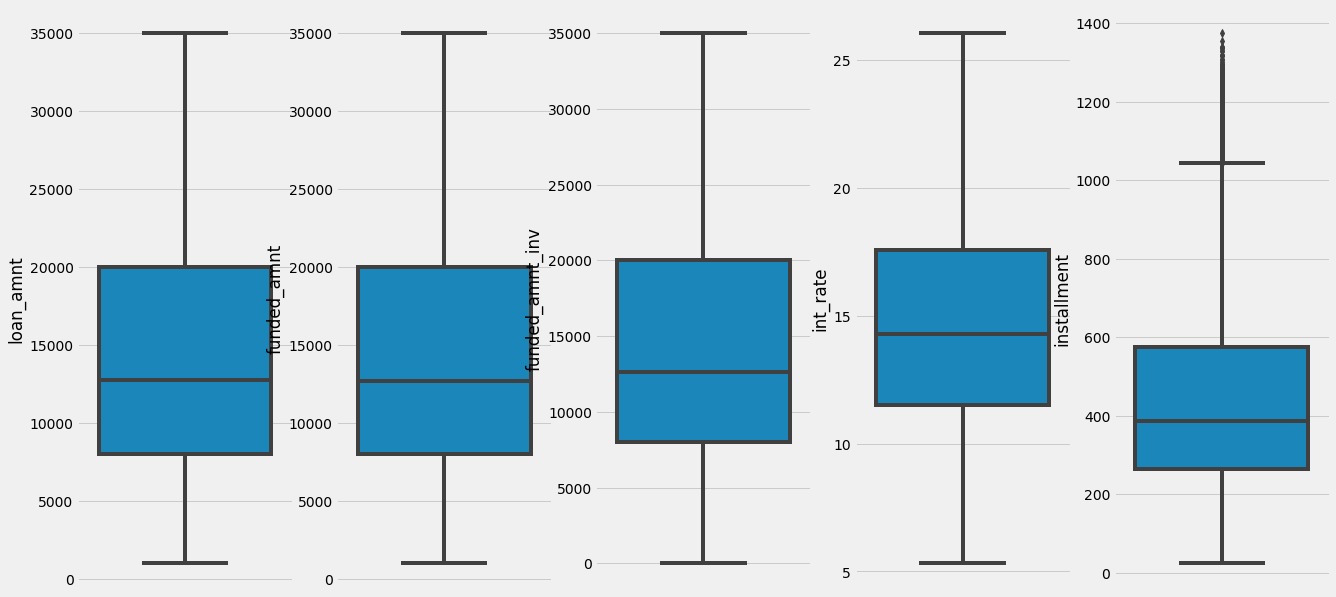

In [95]:
plt.figure(figsize=(20,10))
x = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment']
count=0
for i in x:
    plt.subplot(1,5,count+1)
    sns.boxplot(data=data,y=i)
    count+=1

<AxesSubplot:>

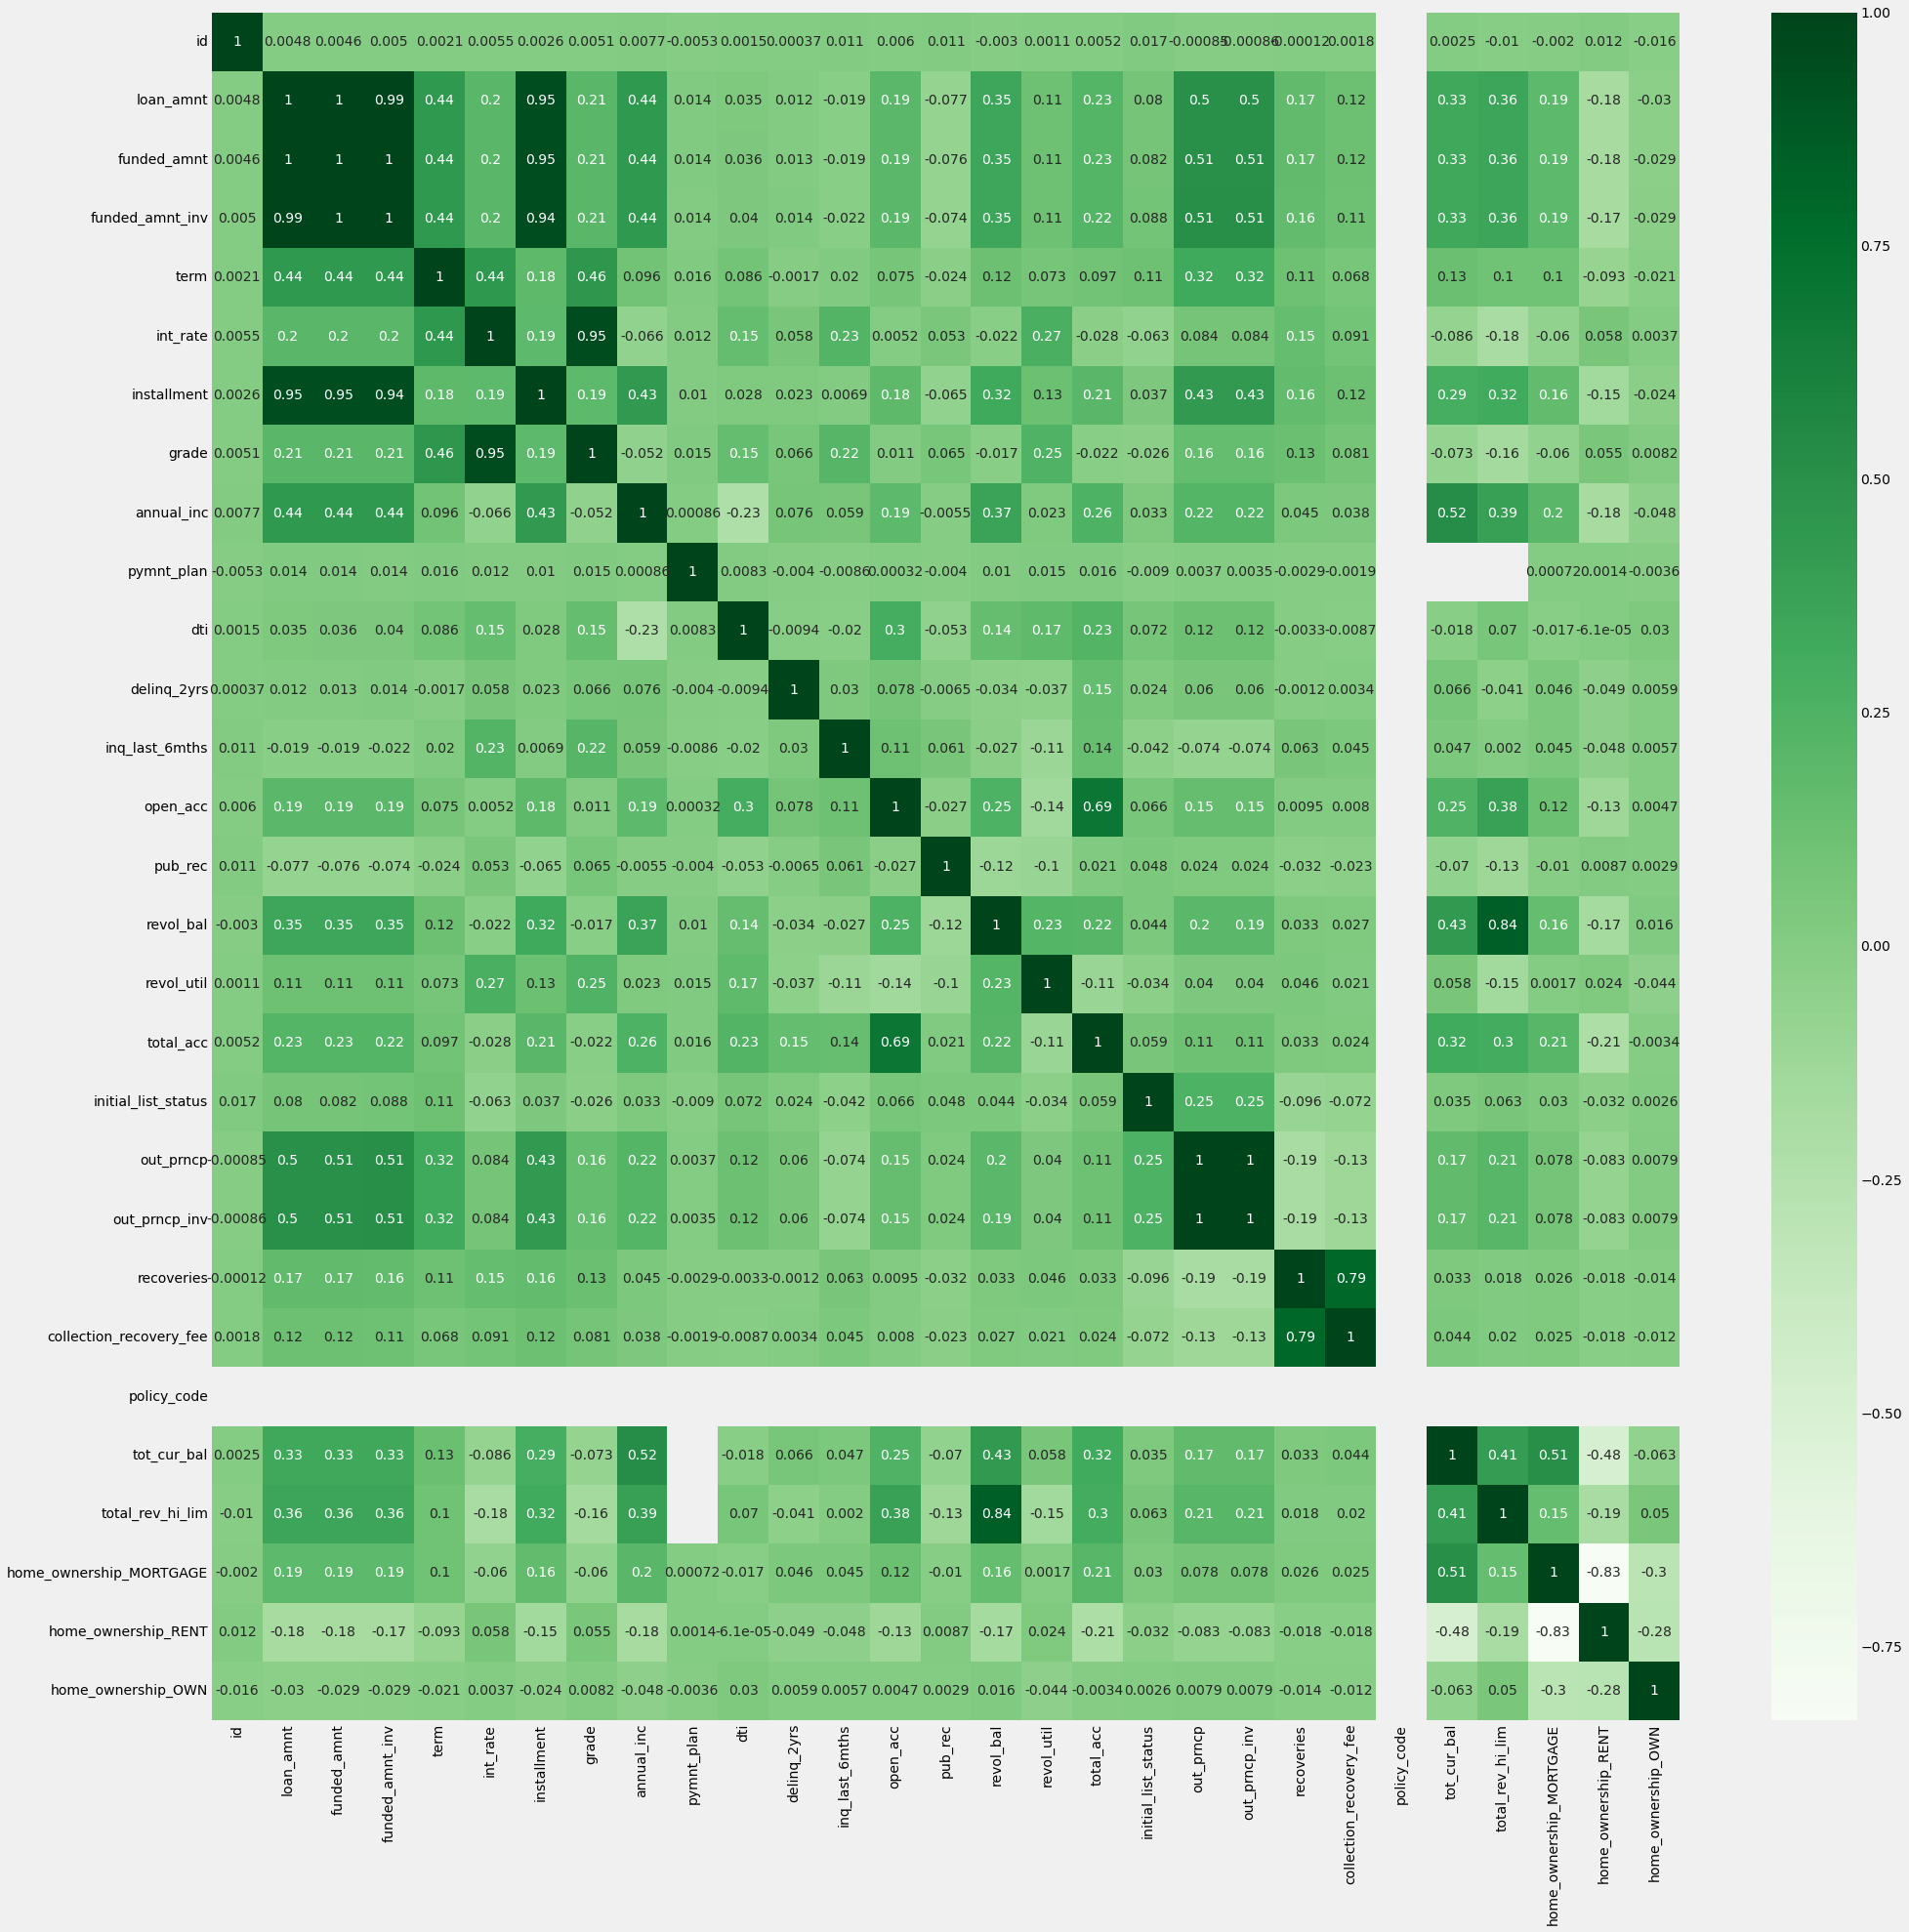

In [96]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(), annot=True, cmap='Greens')

상관계수가 높아보이는 열들을 찾고, 그중 하나만 제거한다

In [97]:
data.drop(['funded_amnt','funded_amnt_inv','out_prncp_inv'],axis=1,inplace=True)

<AxesSubplot:>

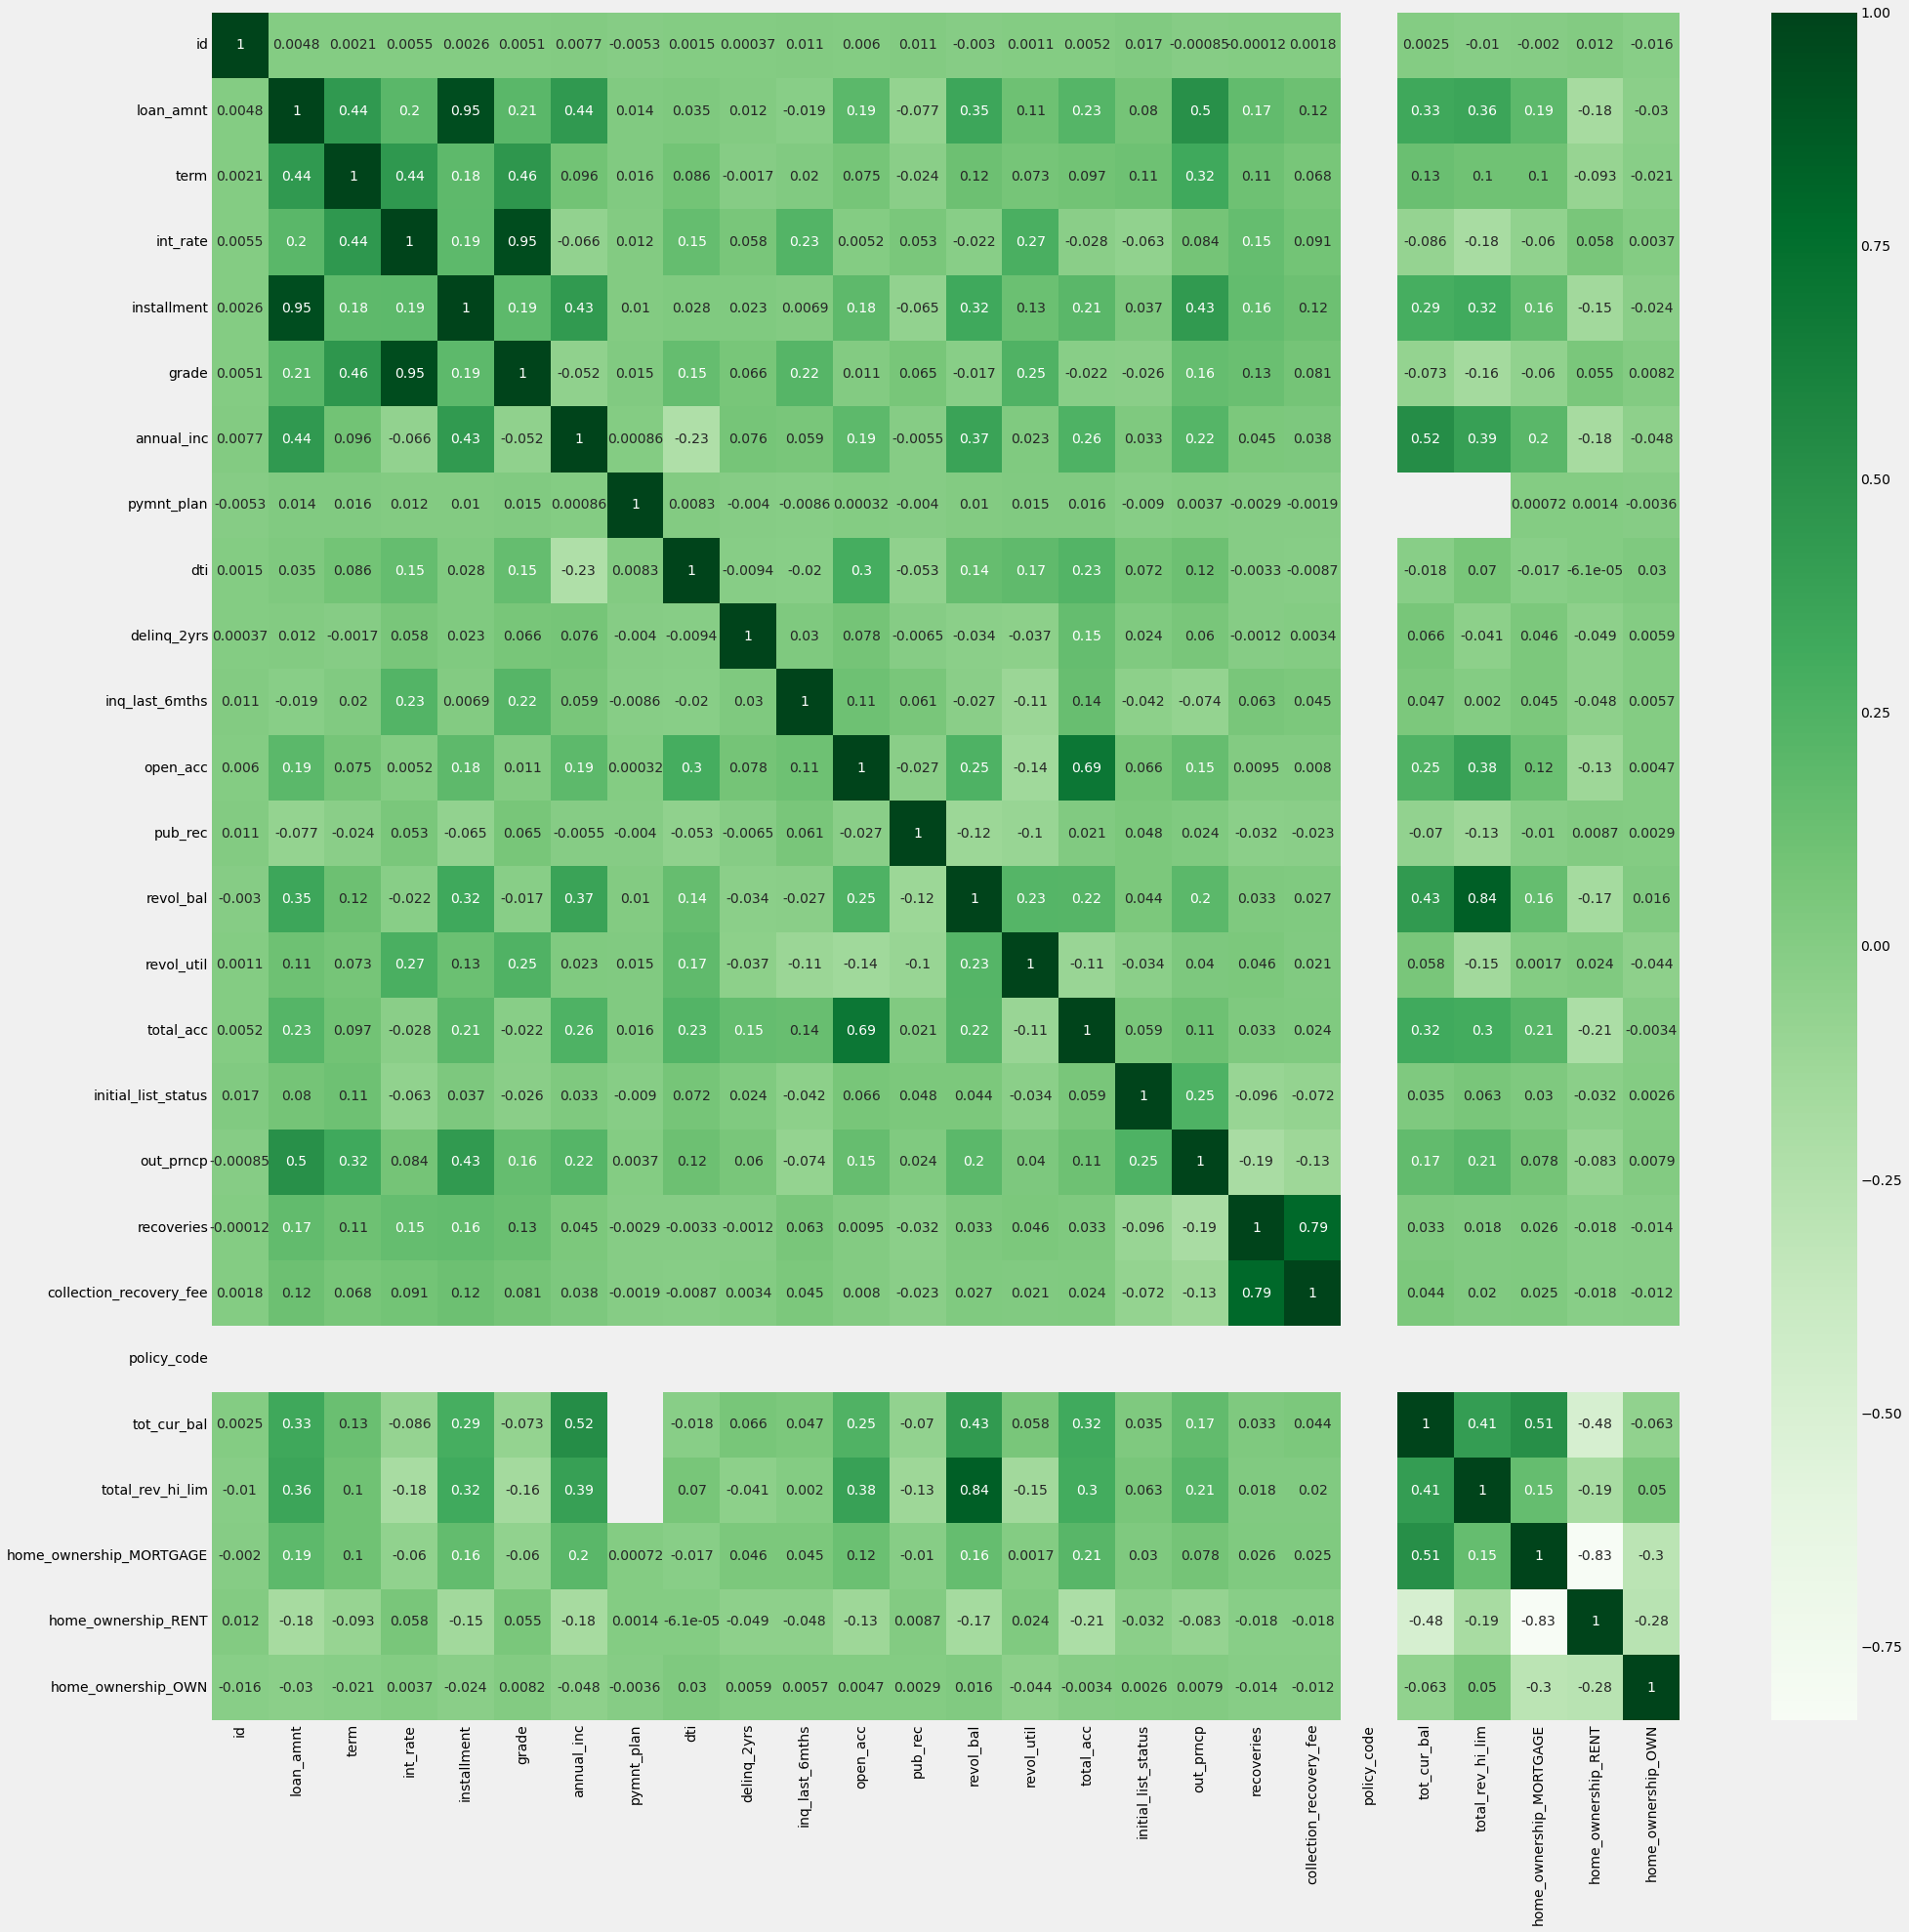

In [99]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(), annot=True, cmap='Greens')

다행히 엄청나게 높은 상관관계가 있는 열은 제거되었고, 이후 열들은 모델을 트레이닝하면서 점차 수정해나가야할 것으로 보인다.